In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
# linkage : 계층형 군집분석, dendrogram: 계층구조나무, cluster: linkage 로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [3]:
df_raw = pd.read_csv("rawdata/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [4]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [5]:
df_raw_y = df_raw_scaled[:, 0]
df_raw_x = df_raw_scaled[:, 1::]

### Dendrogram

In [6]:
#연결: Ward, 거리 계산: euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")

Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

Z_Minkowski = linkage(df_raw_x, method = "average", metric = "minkowski")

Text(0, 0.5, 'sample index')

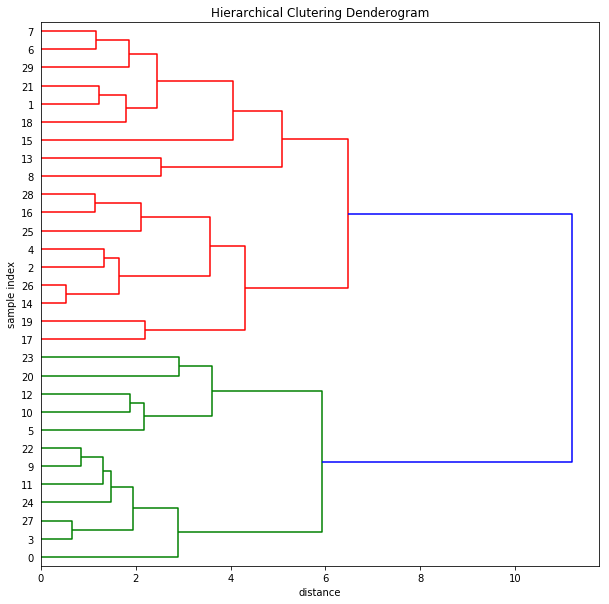

In [7]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clutering Denderogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

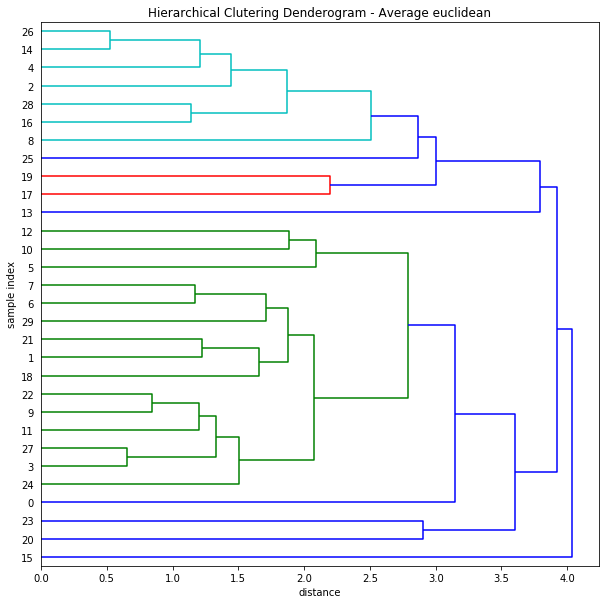

In [8]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clutering Denderogram - Average euclidean")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

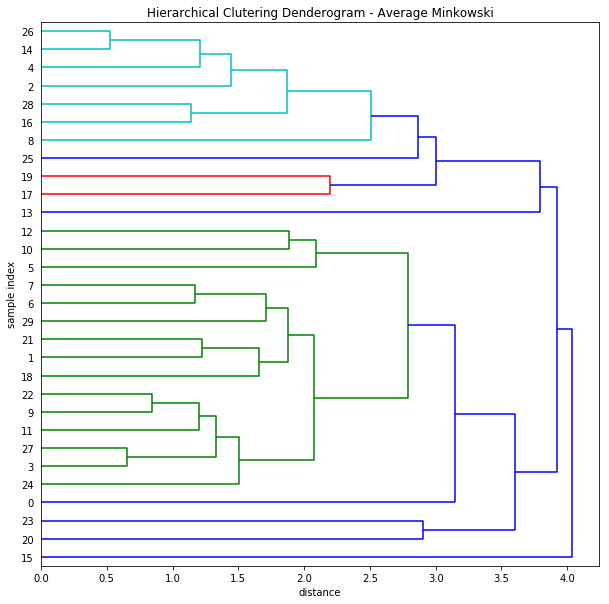

In [9]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

dendrogram(Z_Minkowski, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clutering Denderogram - Average Minkowski")
plt.xlabel("distance")
plt.ylabel("sample index")

### Stratified Cluster

In [10]:
cluter_hierarchical = fcluster(Z = Z_ward, t = 5, criterion  ="distance")
df_raw["ClusterHierarchical"] = cluter_hierarchical

In [11]:
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [15]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["min", "mean", "max"])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.round(3)

,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,CHANCE_min,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
ClusterHierarchical,,,,,,,,,,,,,,,,,,,,,
1,43,57.429,67,51,58.857,66,30,43.571,52,39,...,50,51,59.429,66,74,81.143,92,33,38.571,45
2,40,53.200,69,37,49.400,62,33,46.800,57,34,...,58,43,52.000,58,49,60.000,67,25,35.000,49
3,50,71.889,85,58,73.889,85,54,63.333,71,54,...,75,55,74.333,88,74,79.000,86,46,54.667,72
4,68,70.000,72,82,82.500,83,72,77.500,83,45,...,67,59,65.000,71,77,80.000,83,31,33.000,35
5,58,69.143,82,61,72.714,90,39,47.143,52,54,...,72,60,66.286,75,54,72.000,85,35,40.714,47


### K-means 군집분석

### DBSCAN 군집분석

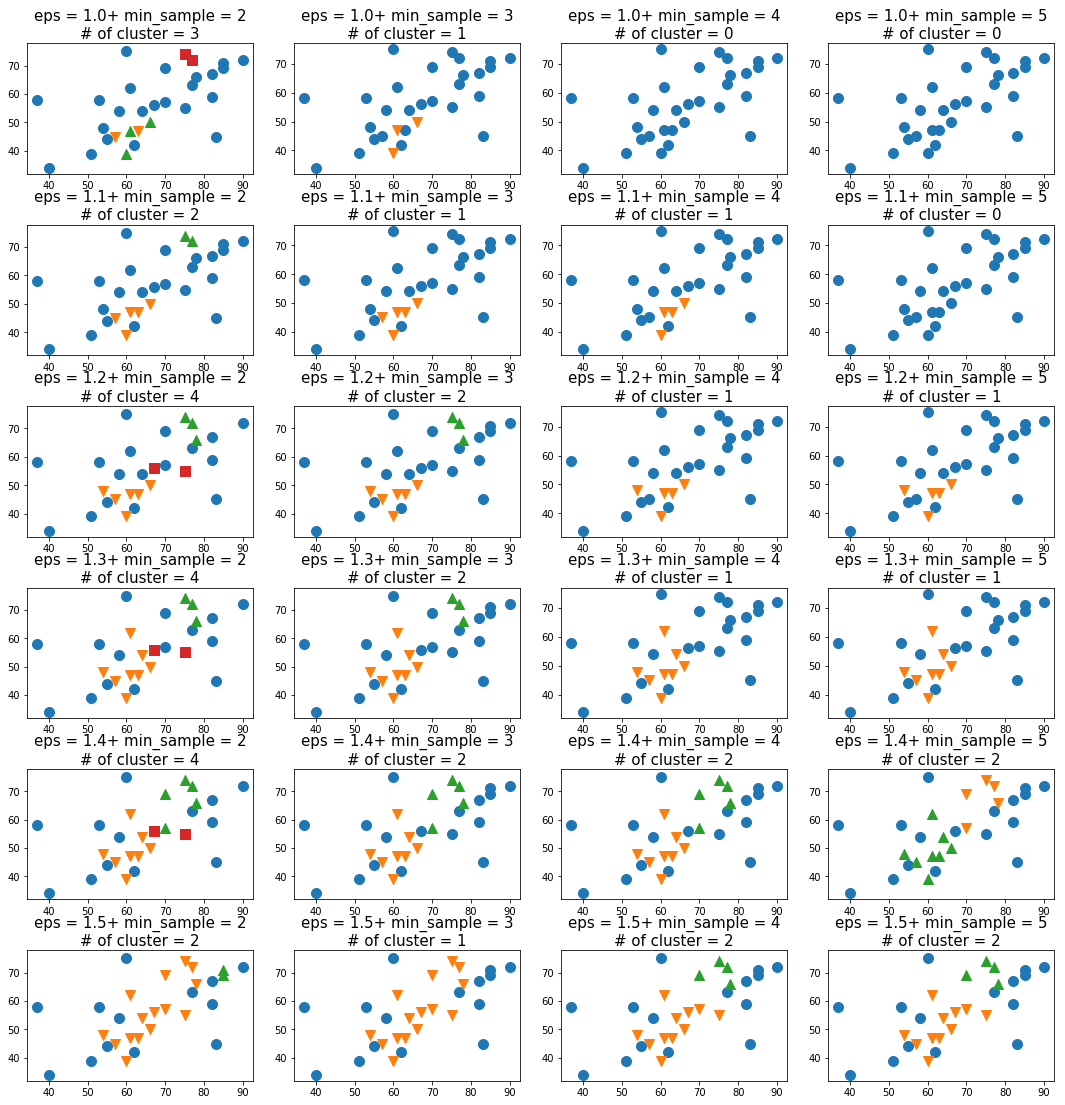

In [61]:
X = df_raw["DISSATIS"]
Y = df_raw["CHANCE"]

# 데이터 포인트 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]

para_eps = [k/10 for k in range (10, 16, 1)]
para_min_sample = [2, 3, 4, 5]

fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15))
fig.tight_layout(w_pad = 1, h_pad = 3)

# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample, eps = eps)
        clusters = dbscan.fit_predict(df_raw_x)
        clusters = clusters + 1 #노이즈의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(cluters) + 1, 1)):
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + "+ min_sample = " + str(min_sample) 
                                 + "\n# of cluster = " + str(max(clusters)), fontsize = 15)

In [63]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리, min_sampels: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps = 1.4, min_samples=2).fit(df_raw_x)

# 군집 결과
cluster_dbscan = dbscan.labels_

for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1

df_raw["ClusterDBscan"] = cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterDBscan
0,43,51,30,39,61,92,45,0
1,63,64,51,54,63,73,47,1
2,71,70,68,69,76,86,48,2
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,2


In [66]:
ds_summary_db = df_raw.groupby("ClusterDBscan").agg(["min", "mean", "max"])

In [67]:
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBscan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
